In [1]:
import pycaret
pycaret.__version__

'3.2.0'

## Load Data

In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Main

Setup ➡️ Compare Models ➡️ Analyze Model ➡️ Prediction

In [3]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

### Setup

In [4]:
exp.setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


### Compare Models

In [5]:
exp.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [6]:
best = exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.0250
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.0660
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,0.1940
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.3390
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.0530
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0160
xgboost,Extreme Gradient Boosting,3278.3216,31628234.0000,5599.0988,0.7709,0.5733,0.4208,0.0300
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.3470
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0160
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0160


In [7]:
best = exp.tune_model(best, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2847.8492,20383682.9523,4514.8292,0.8783,0.4386,0.3704
1,3274.5915,30180753.2058,5493.7012,0.8245,0.4710,0.3679
2,2802.3674,20893298.3503,4570.9188,0.7355,0.5267,0.4530
3,2976.2353,20638704.4453,4542.9841,0.8277,0.4887,0.4656
4,3167.3960,26786801.7896,5175.5968,0.8008,0.4844,0.3614
5,2902.8789,20491482.9644,4526.7519,0.8682,0.3743,0.3146
6,2656.7977,21218371.2374,4606.3403,0.8556,0.4003,0.3460
7,2829.7456,23910542.8206,4889.8408,0.8685,0.4553,0.3384
8,2737.3272,20353927.4461,4511.5327,0.8685,0.4741,0.4297


[I 2024-02-19 17:57:29,751] Searching the best hyperparameters using 936 samples...
[I 2024-02-19 17:57:48,114] Finished hyperparameter search!


### Analyze Model

In [8]:
# exp.evaluate_model(best)

In [9]:
# help(exp.plot_model)

#### Setting

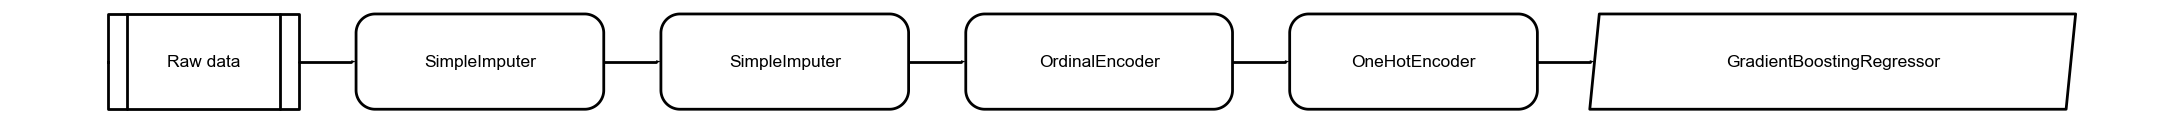

In [10]:
exp.plot_model(best, plot = 'pipeline')

In [11]:
exp.plot_model(best, plot = 'parameter')

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.05177502258707033
loss,squared_error
max_depth,5
max_features,0.428005814632583
max_leaf_nodes,None
min_impurity_decrease,0.007612299489574672


#### Learning

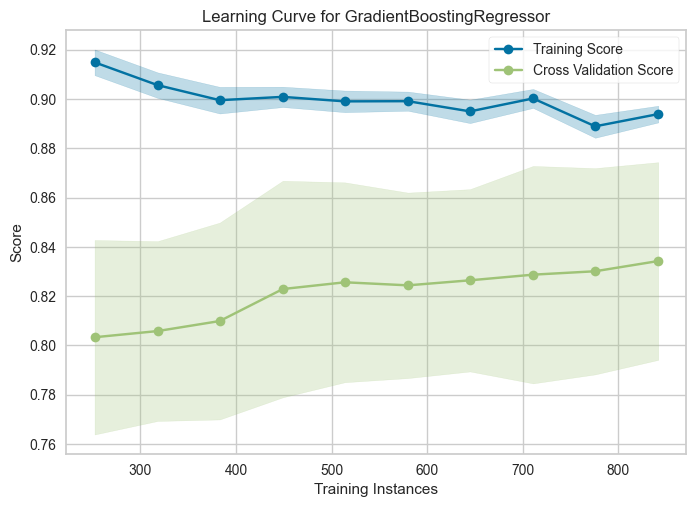

In [12]:
exp.plot_model(best, plot = 'learning')

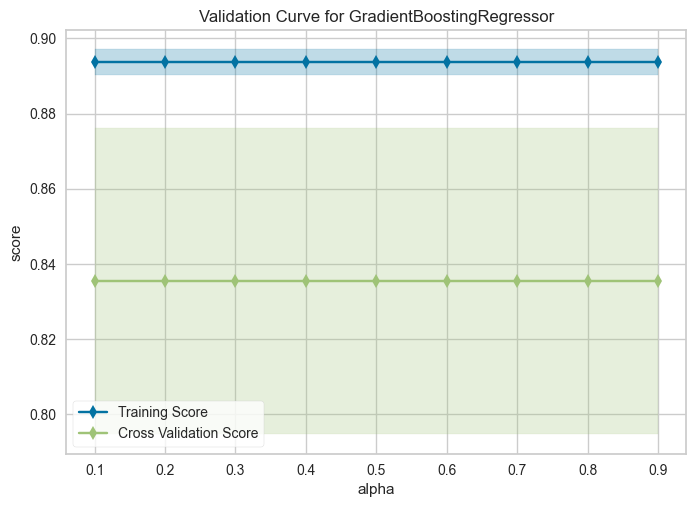

In [13]:
exp.plot_model(best, plot = 'vc')

#### Model Evaluation

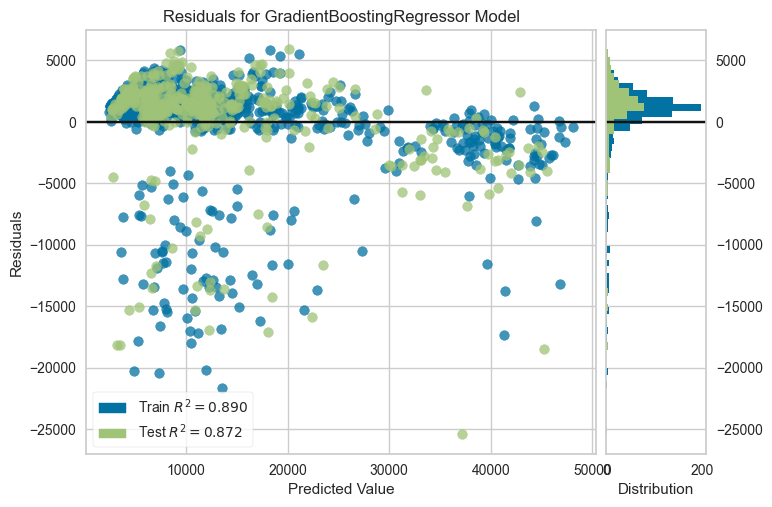

In [14]:
exp.plot_model(best, plot = 'residuals')

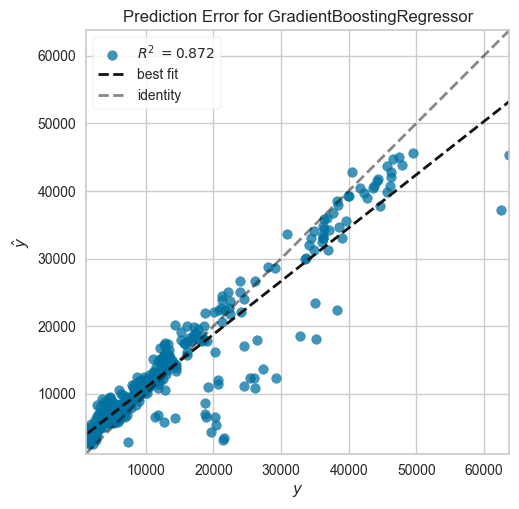

In [15]:
exp.plot_model(best, plot = 'error')

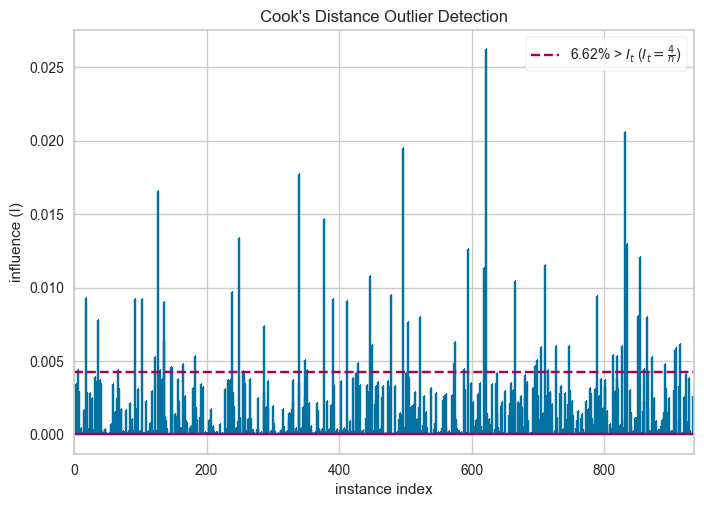

In [16]:
exp.plot_model(best, plot = 'cooks')

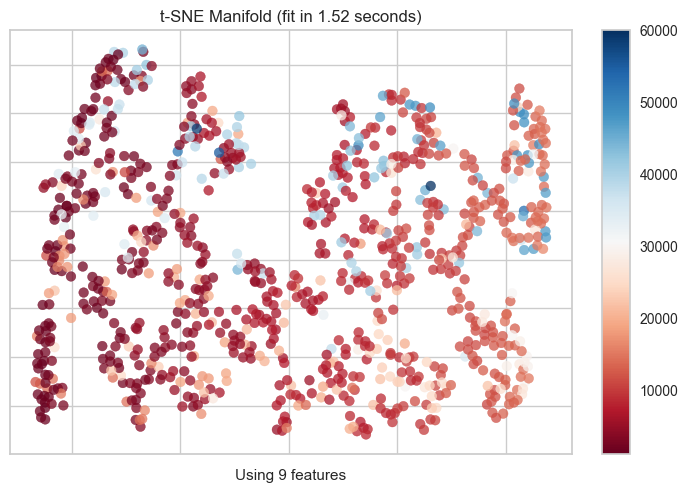

In [17]:
exp.plot_model(best, plot = 'manifold')

In [18]:
# exp.plot_model(best, plot = 'tree')

#### Features Evaluation

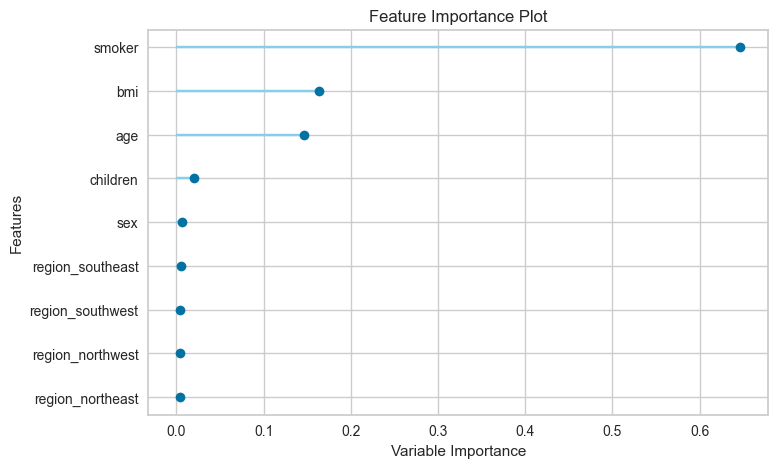

In [19]:
exp.plot_model(best, plot = 'feature')

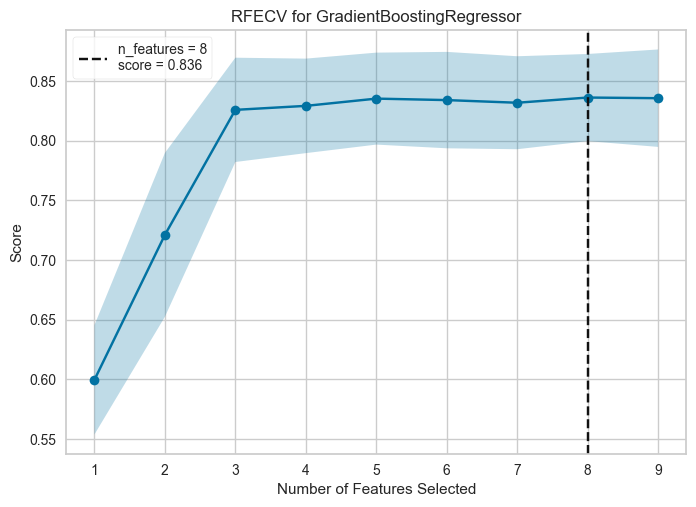

In [20]:
exp.plot_model(best, plot = 'rfe')

### Prediction

In [21]:
holdout_pred = exp.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2736.4706,18303755.4386,4278.2888,0.8719,0.4393,0.3699


In [22]:
holdout_pred.head()

,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10091.055576
319,32,male,37.334999,1,no,northeast,4667.607422,9571.814877
314,27,female,31.400000,0,yes,southwest,34838.871094,31295.326823
150,35,male,24.129999,1,no,northwest,5125.215820,6499.881375
336,60,male,25.740000,0,no,southeast,12142.578125,16777.427076


In [23]:
new_data = data.copy()
new_data.drop('charges', axis=1, inplace=True)
new_data.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [24]:
new_data_pred = exp.predict_model(best, data = new_data)
new_data_pred.head()

,age,sex,bmi,children,smoker,region,prediction_label
0,19,female,27.900000,0,yes,southwest,17856.537206
1,18,male,33.770000,1,no,southeast,5734.427786
2,28,male,33.000000,3,no,southeast,6575.454814
3,33,male,22.705000,0,no,northwest,6689.872243
4,32,male,28.879999,0,no,northwest,4174.548037
